In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
df_Stock = pd.read_csv('/content/IBM.csv', index_col=0)
df_Stock = df_Stock.rename(columns={'Close(t)': 'Close'})

In [ ]:
print("Check for missing values:")
print(df_Stock.isnull().sum())
print("Statistics:")
print(df_Stock.describe())
print("Data types:")
print(df_Stock.dtypes)

Check for missing values:
Open             0
High             0
Low              0
Close            0
Volume           0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 63, dtype: int64
Statistics:
              Open         High          Low        Close        Volume  \
count  4988.000000  4988.000000  4988.000000  4988.000000  4.988000e+03   
mean     98.417719    99.265018    97.629413    98.461201  6.069945e+06   
std      35.560117    35.676171    35.422508    35.551106  3.315519e+06   
min      35.230000    36.550000    34.810000    35.500000  1.027500e+06   
25%      62.137500    62.910000    61.397500    62.160000  3.831175e+06   
50%      93.640000    94.825000    93.035000    94.350000  5.219350e+06   
75%     132.052500   132.917500   131.152500   131.995000  7.350300e+06   
max     160.900000   161.290000   160.090000   161.210000  4.120730e+07   

              SD20   Upper_Band   Lower_Band  S_Clos

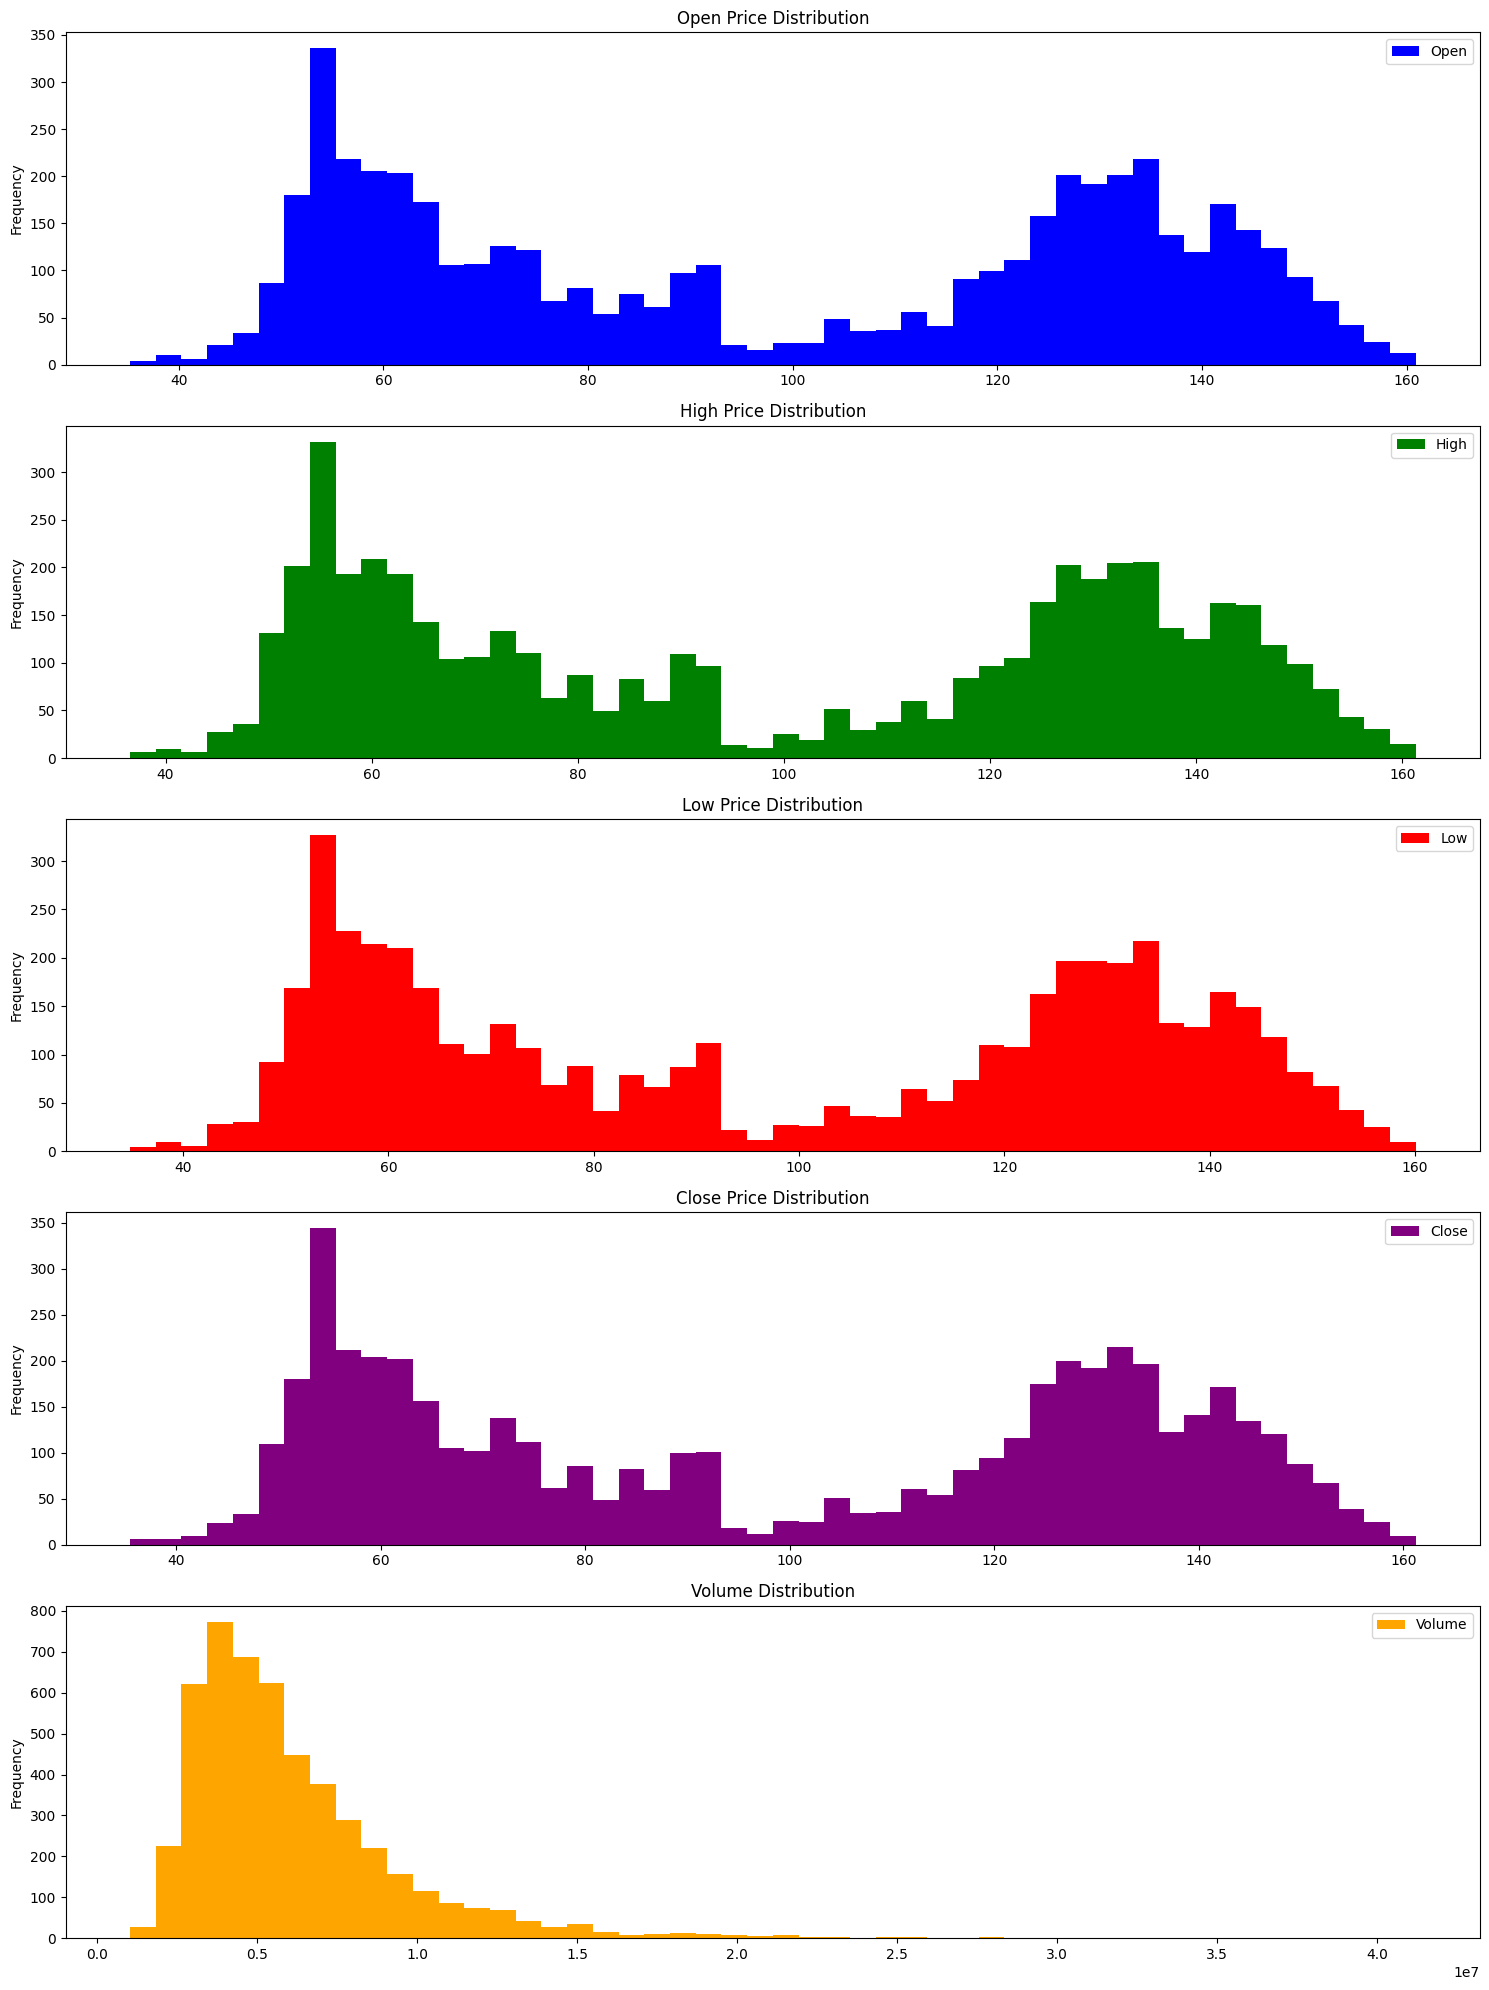

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=False)

# Histogram of Open Prices
axs[0].hist(df_Stock['Open'], bins=50, color='blue', label='Open')
axs[0].set_title('Open Price Distribution')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Histogram of High Prices
axs[1].hist(df_Stock['High'], bins=50, color='green', label='High')
axs[1].set_title('High Price Distribution')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Histogram of Low Prices
axs[2].hist(df_Stock['Low'], bins=50, color='red', label='Low')
axs[2].set_title('Low Price Distribution')
axs[2].set_ylabel('Frequency')
axs[2].legend()

# Histogram of Close Prices
axs[3].hist(df_Stock['Close'], bins=50, color='purple', label='Close')
axs[3].set_title('Close Price Distribution')
axs[3].set_ylabel('Frequency')
axs[3].legend()

# Histogram of Volume
axs[4].hist(df_Stock['Volume'], bins=50, color='orange', label='Volume')
axs[4].set_title('Volume Distribution')
axs[4].set_ylabel('Frequency')
axs[4].legend()

plt.tight_layout()
plt.show()


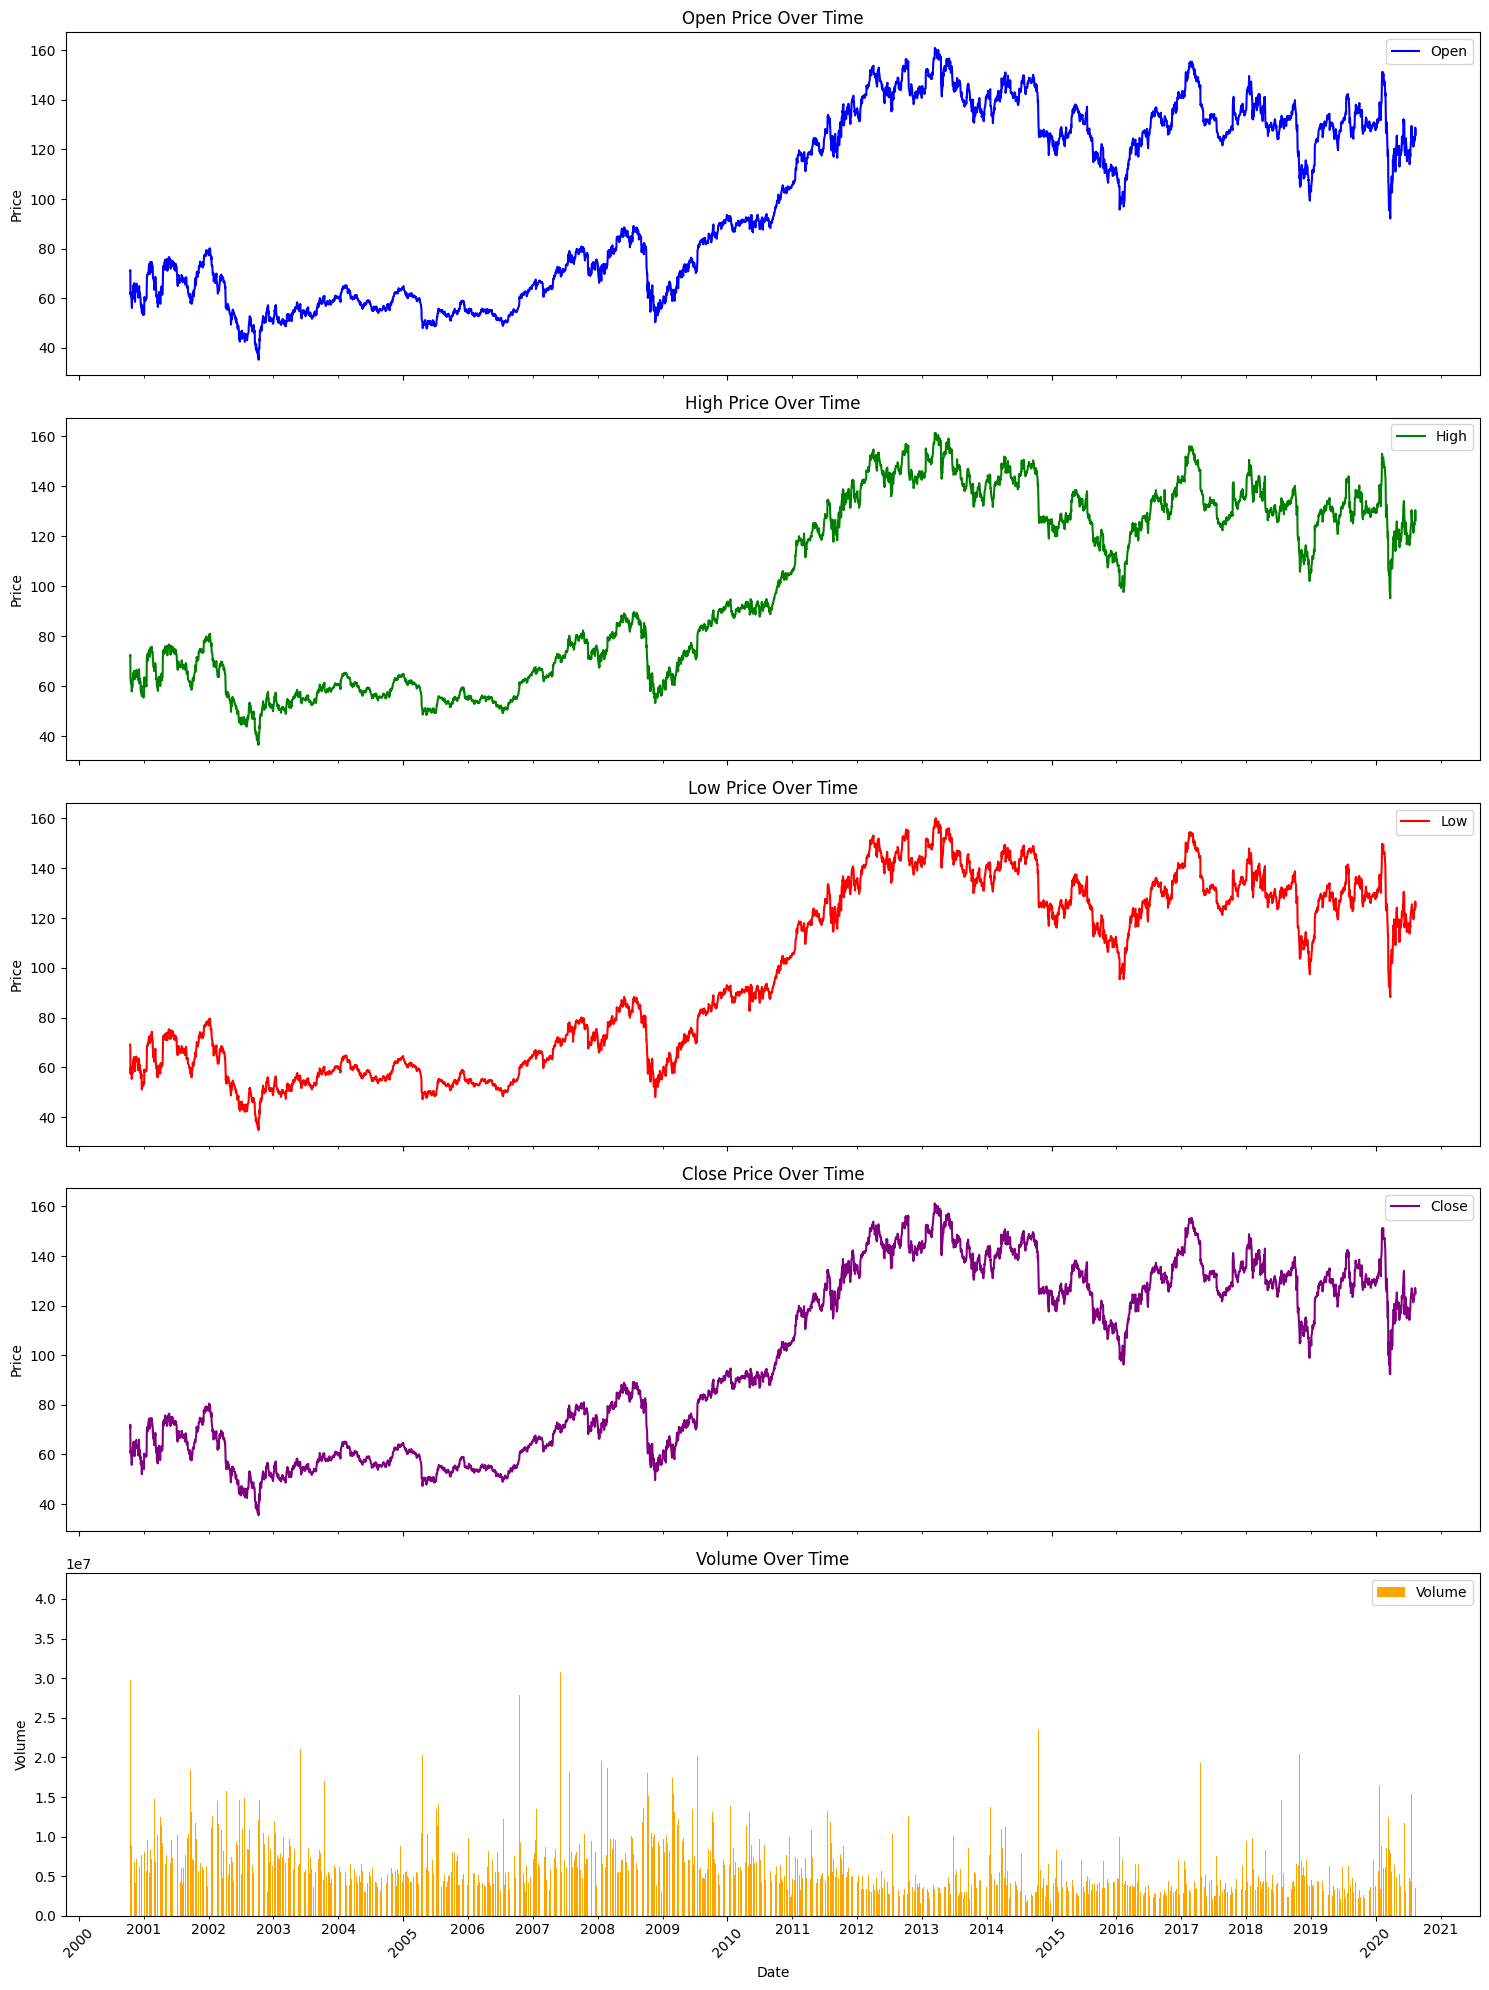

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure the date column is in datetime format
df_Stock['Date_col'] = pd.to_datetime(df_Stock['Date_col'])
df_Stock.set_index('Date_col', inplace=True)

fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

# Plot Open Prices over Time
axs[0].plot(df_Stock.index, df_Stock['Open'], label='Open', color='blue')
axs[0].set_title('Open Price Over Time')
axs[0].set_ylabel('Price')
axs[0].legend()

# Plot High Prices over Time
axs[1].plot(df_Stock.index, df_Stock['High'], label='High', color='green')
axs[1].set_title('High Price Over Time')
axs[1].set_ylabel('Price')
axs[1].legend()

# Plot Low Prices over Time
axs[2].plot(df_Stock.index, df_Stock['Low'], label='Low', color='red')
axs[2].set_title('Low Price Over Time')
axs[2].set_ylabel('Price')
axs[2].legend()

# Plot Close Prices over Time
axs[3].plot(df_Stock.index, df_Stock['Close'], label='Close', color='purple')
axs[3].set_title('Close Price Over Time')
axs[3].set_ylabel('Price')
axs[3].legend()

# Plot Volume over Time
axs[4].bar(df_Stock.index, df_Stock['Volume'], label='Volume', color='orange')
axs[4].set_title('Volume Over Time')
axs[4].set_ylabel('Volume')
axs[4].legend()

# Setting the x-axis major and minor ticks
years = mdates.YearLocator(5)  # every 5 years
years_fmt = mdates.DateFormatter('%Y')

for ax in axs:
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # every year
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



Open - Q1: 62.1375, Q3: 132.0525, IQR: 69.915, Lower Bound: -42.735, Upper Bound: 236.925
Number of outliers detected in Open: 0

High - Q1: 62.910000000000004, Q3: 132.9175, IQR: 70.0075, Lower Bound: -42.101249999999986, Upper Bound: 237.92874999999998
Number of outliers detected in High: 0

Low - Q1: 61.3975, Q3: 131.1525, IQR: 69.755, Lower Bound: -43.23499999999999, Upper Bound: 235.785
Number of outliers detected in Low: 0

Close - Q1: 62.16, Q3: 131.995, IQR: 69.83500000000001, Lower Bound: -42.592500000000015, Upper Bound: 236.7475
Number of outliers detected in Close: 0

Volume - Q1: 3831175.0, Q3: 7350300.0, IQR: 3519125.0, Lower Bound: -1447512.5, Upper Bound: 12628987.5
Number of outliers detected in Volume: 226
Outliers in Volume:
               Open    High     Low   Close    Volume      SD20  Upper_Band  \
Date_col                                                                     
2000-10-18   61.64   63.15   57.50   60.80  29777800  4.207529   81.106557   
2000-10-19

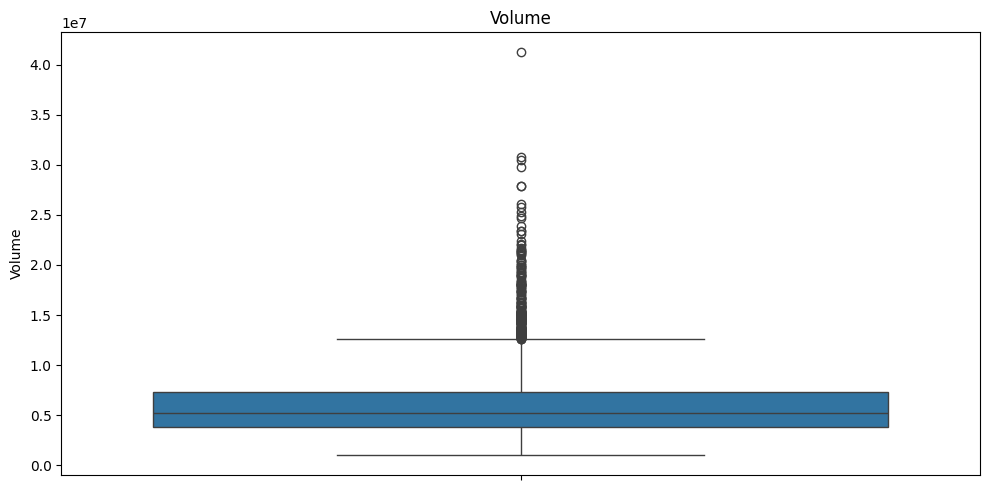

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n{column.capitalize()} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers detected in {column}: {len(outliers)}")

    return outliers

price_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for column in price_columns:
    outliers = detect_outliers(df_Stock, column)
    if not outliers.empty:
        print(f"Outliers in {column}:\n", outliers)

        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df_Stock[column])
        plt.title(f'{column.capitalize()}')
        plt.tight_layout()
        plt.show()

With Cross-Validation

Cross-validation R-squared scores: [ 0.07772671  0.53198389  0.90425061  0.36970273 -0.53281672]
Mean CV R-squared score: 0.270169442482537


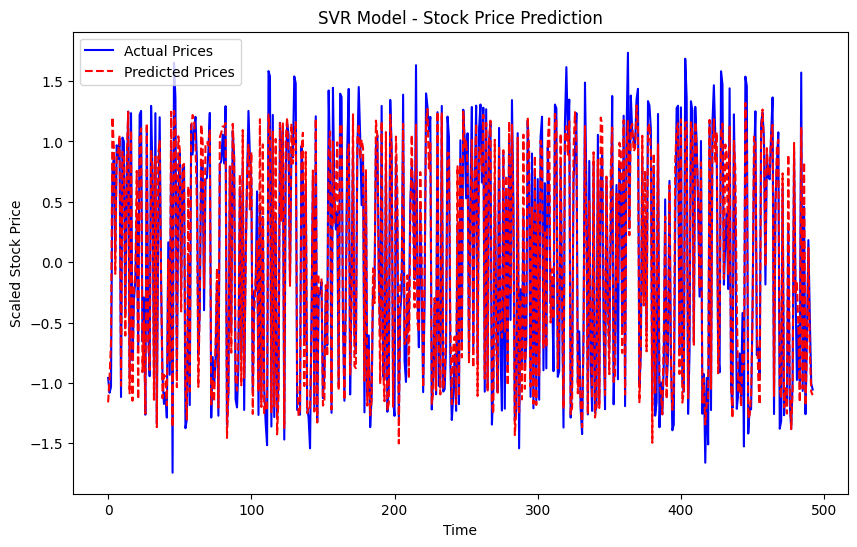

R-squared score:  0.9383970479416399
Cross-validation R-squared score:  0.270169442482537
Mean Absolute Percentage Error (MAPE):  33.69675559703506
Mean Squared Error (MSE):  0.06205148595168897
Root Mean Squared Error (RMSE):  0.24910135678411904
Mean Absolute Error (MAE):  0.1917633439534467


In [ ]:
# Drop 'Date_col' if it exists
if 'Date_col' in df_Stock.columns:
    df_Stock = df_Stock.drop(columns='Date_col')

# Define MAPE function
def get_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the dataset
scaler = StandardScaler()
df_Stock_scaled = pd.DataFrame(scaler.fit_transform(df_Stock), columns=df_Stock.columns)

# Prepare data for SVR
df1 = df_Stock_scaled[['Close']].copy()
df1['Prediction'] = df1['Close'].shift(-60)

X = np.array(df1.drop(['Prediction'], axis=1))
X = X[:-60]

y = np.array(df1['Prediction'])
y = y[:-60]

# Initialize SVR model
svr = SVR(kernel='rbf', C=1000, gamma=0.1)

# Perform cross-validation
cv_scores = cross_val_score(svr, X, y, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", cv_scores)
print("Mean CV R-squared score:", np.mean(cv_scores))

# Split the data for final model evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Train SVR model on training data
svr.fit(x_train, y_train)

# Make predictions
y_pred = svr.predict(x_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed', label='Predicted Prices')
plt.title('SVR Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.show()

# Performance metrics
print("R-squared score: ", svr.score(x_test, y_test))
print("Cross-validation R-squared score: ", np.mean(cv_scores))  # Mean CV R-squared score
print("Mean Absolute Percentage Error (MAPE): ", get_mape(y_test, y_pred))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))

Without Cross-Validation

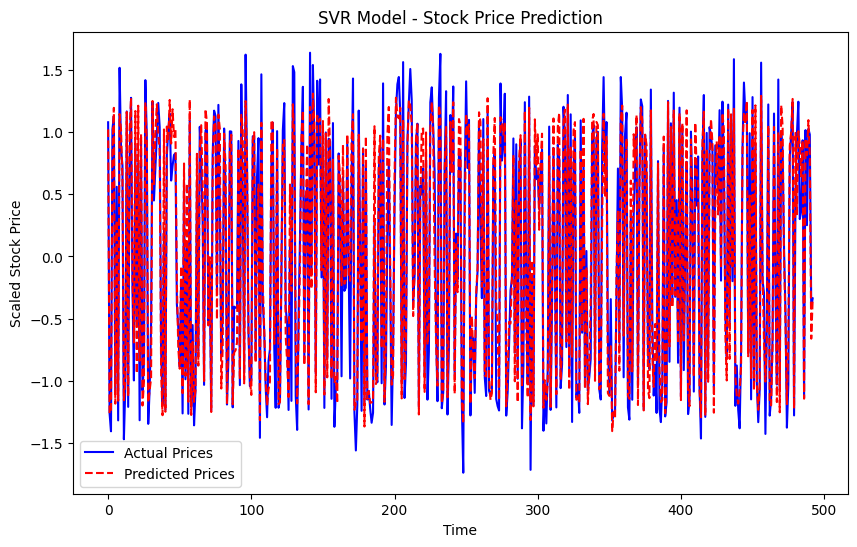

R-squared score:  0.9383204722657847
Mean Absolute Percentage Error (MAPE):  31.564325070218363
Mean Squared Error (MSE):  0.06066376346057727
Root Mean Squared Error (RMSE):  0.24630014912820755
Mean Absolute Error (MAE):  0.1857671122052227


In [ ]:
# Drop 'Date_col' if it exists
if 'Date_col' in df_Stock.columns:
    df_Stock = df_Stock.drop(columns='Date_col')

# Standardize the dataset
scaler = StandardScaler()
df_Stock_scaled = pd.DataFrame(scaler.fit_transform(df_Stock), columns=df_Stock.columns)

# Prepare data for SVR
df1 = df_Stock_scaled[['Close']].copy()
df1['Prediction'] = df1['Close'].shift(-60)

X = np.array(df1.drop(['Prediction'], axis=1))
X = X[:-60]

y = np.array(df1['Prediction'])
y = y[:-60]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Initialize and train SVR model
svr = SVR(kernel='rbf', C=1000, gamma=0.1)
svr.fit(x_train, y_train)

# Make predictions
y_pred = svr.predict(x_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed', label='Predicted Prices')
plt.title('SVR Model - Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.show()

# Performance metrics
print("R-squared score: ", svr.score(x_test, y_test))

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage Error (MAPE): ", get_mape(y_test, y_pred))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
